<a href="https://colab.research.google.com/github/arju-gituser/Python-Codes/blob/master/Congressional_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
from google.colab import files
uploaded = files.upload()

Saving house-votes-84_csv.csv to house-votes-84_csv.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['house-votes-84_csv.csv']))
df.info()
df.describe()
#df.head().T
df.replace(to_replace="?",value="UD")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Att1    435 non-null    object
 1   Att2    435 non-null    object
 2   Att3    435 non-null    object
 3   Att4    435 non-null    object
 4   Att5    435 non-null    object
 5   Att6    435 non-null    object
 6   Att7    435 non-null    object
 7   Att8    435 non-null    object
 8   Att9    435 non-null    object
 9   Att10   435 non-null    object
 10  Att11   435 non-null    object
 11  Att12   435 non-null    object
 12  Att13   435 non-null    object
 13  Att14   435 non-null    object
 14  Att15   435 non-null    object
 15  Att16   435 non-null    object
 16  Class   435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Class
0,n,y,n,y,y,y,n,n,n,y,UD,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,UD,republican
2,UD,y,y,UD,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,UD,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,UD,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,UD,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,UD,UD,UD,UD,n,y,y,y,n,y,republican


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#df[~ df['Unnamed: 13'].isna()].T
#Dropping the column
#df.drop('Unnamed: 13',axis=1,inplace=True)

df.describe()


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Class
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
top,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y,democrat
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269,267


In [10]:
df["Class"] = [1 if i =="democrat" else 0  for i in df.Class]

           Att1      Att2      Att3  ...     Att15     Att16     Class
Att1   1.000000  0.113285  0.400390  ...  0.237148  0.013117  0.343765
Att2   0.113285  1.000000  0.058305  ... -0.048481  0.033642  0.012553
Att3   0.400390  0.058305  1.000000  ...  0.410673  0.025983  0.653350
Att4  -0.251020  0.096005 -0.506730  ... -0.331028  0.056096 -0.845775
Att5  -0.227275  0.149671 -0.461352  ... -0.365858  0.049688 -0.653685
Att6  -0.282366  0.139457 -0.330006  ... -0.291951  0.020194 -0.404672
Att7   0.305418 -0.098663  0.532755  ...  0.397591  0.129435  0.454085
Att8   0.342216 -0.089885  0.625309  ...  0.410819  0.067011  0.624716
Att9   0.198328 -0.120355  0.409317  ...  0.315904  0.114935  0.445360
Att10 -0.032499  0.002419  0.077254  ...  0.050040  0.188263 -0.073670
Att11  0.153867  0.233507  0.207823  ...  0.243513  0.064382  0.323262
Att12 -0.255671 -0.001782 -0.413255  ... -0.258061  0.062960 -0.533989
Att13 -0.204798  0.165868 -0.389498  ... -0.270135  0.082693 -0.432920
Att14 

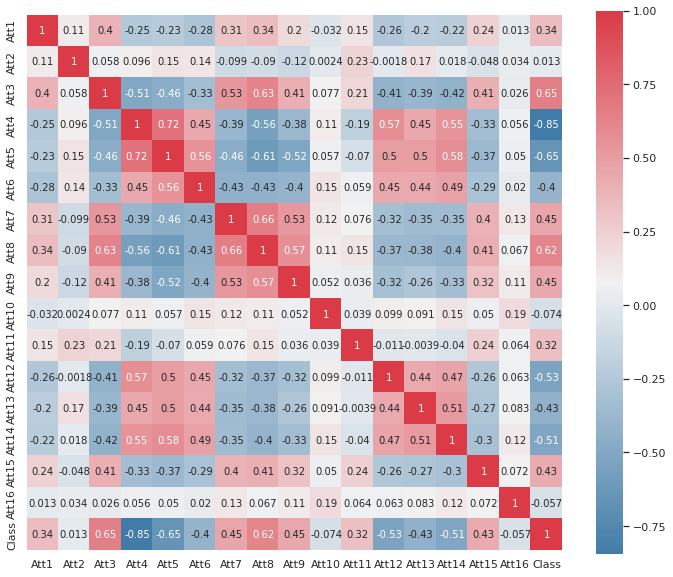

In [42]:
def plot_correlation_map( df ):
    corr = df.corr()
    print(corr)
    print(corr.iloc[0:,16])
    f, ax = plt.subplots(figsize=(12, 10))
    #_ , ax = plt.subplots( figsize =( 50 , 30 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, annot = True)
plot_correlation_map(df)

In [12]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

[0.01941102 0.01537513 0.10583049 0.32539772 0.08508845 0.01535457
 0.02199088 0.04865291 0.07622163 0.01423574 0.04787225 0.09505813
 0.03685986 0.04344882 0.02878086 0.02042154]


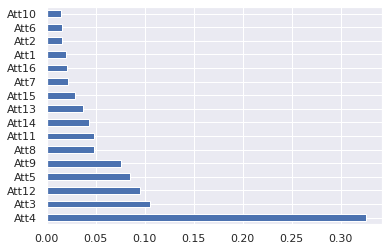

In [21]:
#Feature Importance
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
#We can see that we are given an importance score for each attribute where the larger score the more important the attribute
#In the example below we construct a ExtraTreesClassifier classifier for the  dataset.
X = df.iloc[:,0:16]  #independent columns
y = df.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [45]:
#Univariate Selection
#provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:16] #independent columns
y = df.iloc[:,-1] #target column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(16,'Score')) #print 10 best features

    Specs      Score
3    Att4  64.539710
4    Att5  40.523601
7    Att8  35.528776
2    Att3  35.483522
11  Att12  33.855293
13  Att14  24.180585
14  Att15  21.476296
8    Att9  20.919070
12  Att13  20.568940
6    Att7  18.566755
5    Att6  12.936973
0    Att1  10.837171
10  Att11  10.698866
15  Att16   0.742409
9   Att10   0.449389
1    Att2   0.022770


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
y1 = df['Class']

### Relf: 20,9,4,10,2,13,17,12,6,3,18,11,19,1,14,15,8,5,16,7 : 20
#GR: 20,9,8,17,4,10,11,2,7,1,12,3,19,6,15,14,13,5,16,18 : 20(numtonominal)
#Infogain: 20,9,4,8,10,2,17,1,7,11,3,12,6,14,19,5,13,15,16,18 : 20

#Mean: 20, 1,3, 12,10,7,6,11,15,18,5,13,16,19,2,14,4,9,17,8
#Mean2:20,9,4,8,10,2,17,12,11,,3,13,1,6,19,18,14,15,7,5,16(IG+RF+GR)
#x5=df[['Att20','Att9','Att4','Att10','Att2','Att17','Att12','Att13','Att11',]]
#print(x5)
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, y1, test_size=0.10, random_state=0)
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)


Random Forest

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[17  0]
 [ 0 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        27

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



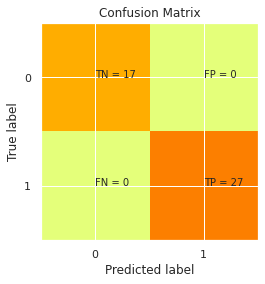

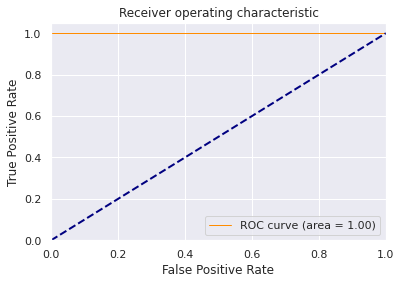


Acuuracy Of the Model:  1.0 




In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

acc = [] # list to store all performance metric

from sklearn import metrics
def plot_confusion_metrix(Y_test,model_test):
    cm = metrics.confusion_matrix(Y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(Y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(Y_test, model_test))
   #cm = metrics.confusion_matrix(Y_test, model_test)
    plot_confusion_metrix(Y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,Y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(Y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



print("\nRandom Forest\n")
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring = 'roc_auc')
CV_rfc.fit(X_trainval, Y_trainval.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)



Confusion Matrix:
[[16  1]
 [ 0 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        27

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



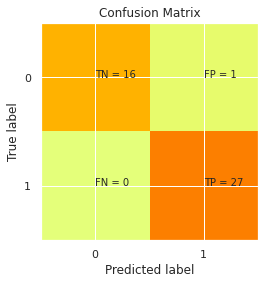

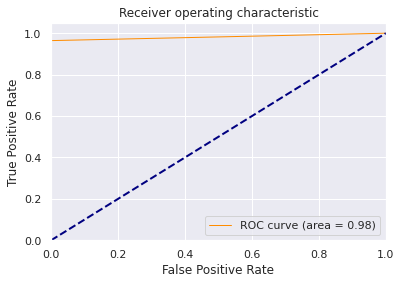


Acuuracy Of the Model:  0.9772727272727273 




In [32]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

LGBMClassifier : 


Confusion Matrix:
[[16  1]
 [ 0 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        27

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



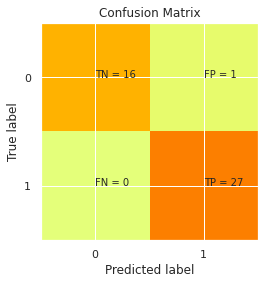

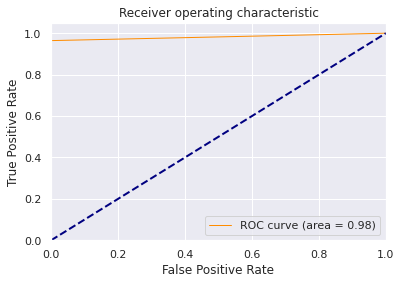


Acuuracy Of the Model:  0.9772727272727273 


ExtraTreesClassifier : 


Confusion Matrix:
[[16  1]
 [ 0 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        27

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



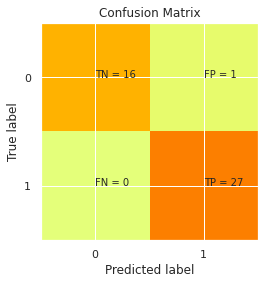

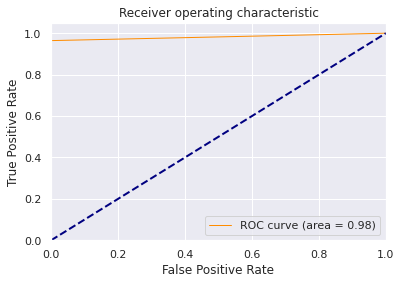


Acuuracy Of the Model:  0.9772727272727273 


GradientBoostingClassifier : 


Confusion Matrix:
[[16  1]
 [ 0 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        27

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



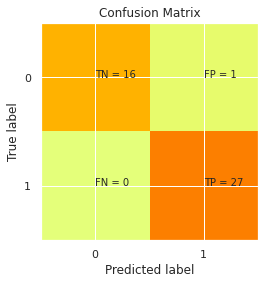

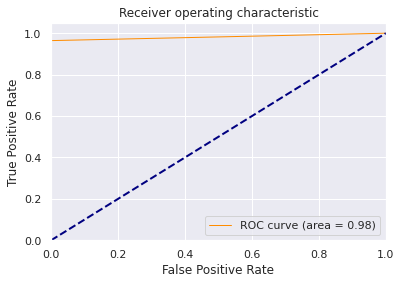


Acuuracy Of the Model:  0.9772727272727273 


AdaBoostClassifier : 


Confusion Matrix:
[[16  1]
 [ 1 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        27

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



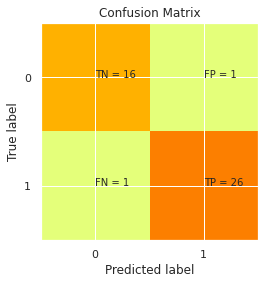

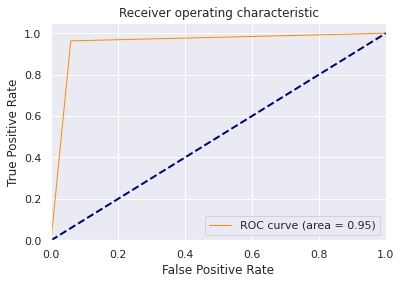


Acuuracy Of the Model:  0.9545454545454546 


KNeighborsClassifier : 


Confusion Matrix:
[[15  2]
 [ 5 22]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.92      0.81      0.86        27

    accuracy                           0.84        44
   macro avg       0.83      0.85      0.84        44
weighted avg       0.85      0.84      0.84        44



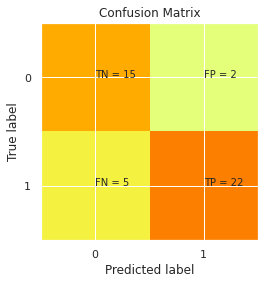

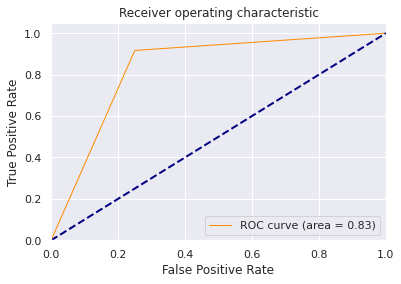


Acuuracy Of the Model:  0.8409090909090909 


MLPClassifier : 


Confusion Matrix:
[[15  2]
 [ 3 24]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.89      0.91        27

    accuracy                           0.89        44
   macro avg       0.88      0.89      0.88        44
weighted avg       0.89      0.89      0.89        44



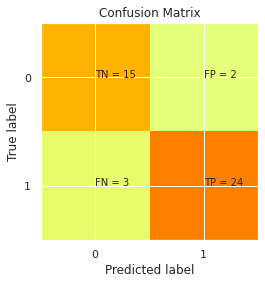

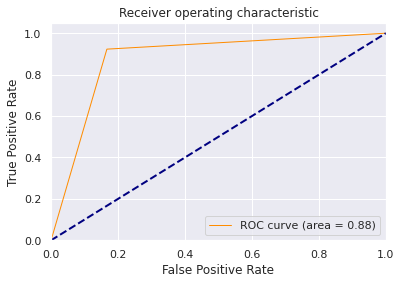


Acuuracy Of the Model:  0.8863636363636364 


GaussianNB : 


Confusion Matrix:
[[15  2]
 [ 3 24]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.89      0.91        27

    accuracy                           0.89        44
   macro avg       0.88      0.89      0.88        44
weighted avg       0.89      0.89      0.89        44



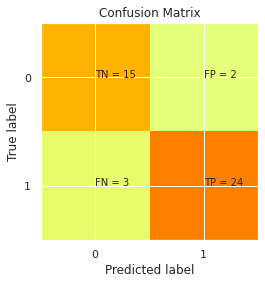

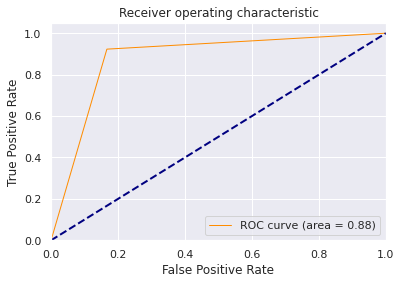


Acuuracy Of the Model:  0.8863636363636364 


LogisticRegression : 


Confusion Matrix:
[[15  2]
 [ 3 24]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.89      0.91        27

    accuracy                           0.89        44
   macro avg       0.88      0.89      0.88        44
weighted avg       0.89      0.89      0.89        44



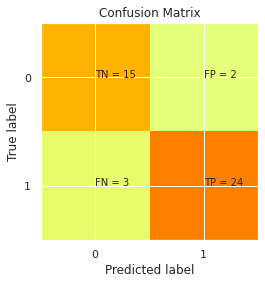

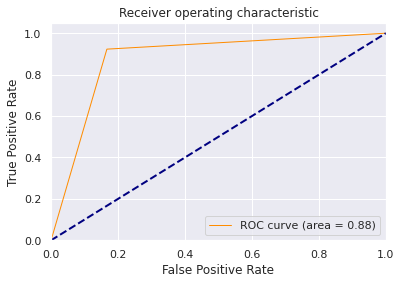


Acuuracy Of the Model:  0.8863636363636364 




In [33]:
#other classifiers
clfs =[LGBMClassifier(random_state=0),ExtraTreesClassifier(random_state=0),GradientBoostingClassifier(random_state=0),AdaBoostClassifier(random_state=0),KNeighborsClassifier(),
          MLPClassifier(alpha=1,random_state=0),GaussianNB(),LogisticRegression(random_state=0)]

for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_trainval,Y_trainval.ravel())
    X = pd.DataFrame(X_trainval)
    report_performance(model)
    roc_curves(model)
    accuracy(model)



Confusion Matrix:
[[16  1]
 [ 1 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        27

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



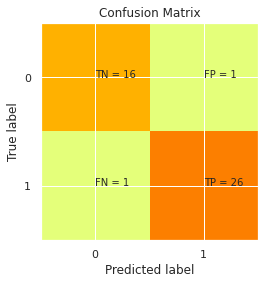

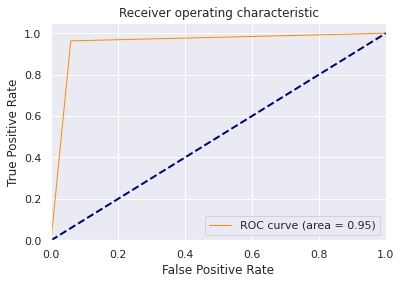


Acuuracy Of the Model:  0.9545454545454546 




In [34]:
svm = SVC(kernel="linear", C=0.5,random_state=0)
svm.fit(X_trainval, Y_trainval.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)